## Pyspark programming

In [1]:
import pyspark
from pyspark import SparkContext, SparkConf

In [3]:
conf=SparkConf().setAppName("first_spark_app").setMaster("local")
sc=SparkContext(conf=conf)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/12 10:05:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
print(sc)

<SparkContext master=local appName=first_spark_app>


In [5]:
print(sc.appName)
print(sc.master)

first_spark_app
local


#### RDD Operations:
1. Transformation
   - **map(func)**:	Return a new distributed dataset formed by passing each element of the source through a function func.
   - **filter(func)**:	Return a new dataset formed by selecting those elements of the source on which func returns true.
   - **flatMap(func)**:	 Similar to map, but each input item can be mapped to 0 or more output items (so func should return a Seq rather than a single item).
   - **mapPartitions(func)**:	Similar to map, but runs separately on each partition (block) of the RDD, so func must be of type Iterator(T) => Iterator(U) when running on an RDD of type T.
   - **mapPartitionsWithIndex(func)**:	Similar to mapPartitions, but also provides func with an integer value representing the index of the partition, so func must be of type (Int, Iterator(T)) => Iterator(U) when running on an RDD of type T.
   - **sample(withReplacement, fraction, seed)**:	Sample a fraction fraction of the data, with or without replacement, using a given random number generator seed.
   - **union(otherDataset)**:	Return a new dataset that contains the union of the elements in the source dataset and the argument.
   - **intersection(otherDataset)**	 : Return a new RDD that contains the intersection of elements in the source dataset and the argument.
   - **distinct([numPartitions])**	 : Return a new dataset that contains the distinct elements of the source dataset.
   - **groupByKey([numPartitions])**:	When called on a dataset of (K, V) pairs, returns a dataset of (K, Iterable(V)) pairs.
   - **reduceByKey(func, [numPartitions])**	: When called on a dataset of (K, V) pairs, returns a dataset of (K, V) pairs where the values for each key are aggregated using the given reduce function func, which must be of type (V,V) => V. Like in groupByKey, the number of reduce tasks is configurable through an optional second argument.
   - **aggregateByKey(zeroValue)(seqOp, combOp, [numPartitions])**:	When called on a dataset of (K, V) pairs, returns a dataset of (K, U) pairs where the values for each key are aggregated using the given combine functions and a neutral "zero" value. Allows an aggregated value type that is different than the input value type, while avoiding unnecessary allocations. Like in groupByKey, the number of reduce tasks is configurable through an optional second argument.
   - **sortByKey([ascending], [numPartitions])**:	When called on a dataset of (K, V) pairs where K implements Ordered, returns a dataset of (K, V) pairs sorted by keys in ascending or descending order, as specified in the boolean ascending argument.
   - **join(otherDataset, [numPartitions])**:	When called on datasets of type (K, V) and (K, W), returns a dataset of (K, (V, W)) pairs with all pairs of elements for each key. Outer joins are supported through leftOuterJoin, rightOuterJoin, and fullOuterJoin.
   - **cogroup(otherDataset, [numPartitions])**	: When called on datasets of type (K, V) and (K, W), returns a dataset of (K, (Iterable<(V), Iterable(W))) tuples. This operation is also called groupWith.
   - **cartesian(otherDataset)**:	When called on datasets of types T and U, returns a dataset of (T, U) pairs (all pairs of elements).
   - **pipe(command, [envVars])**:	Pipe each partition of the RDD through a shell command, e.g. a Perl or bash script. RDD elements are written to the process's stdin and lines output to its stdout are returned as an RDD of strings.
   - **coalesce(numPartitions)**:	Decrease the number of partitions in the RDD to numPartitions. Useful for running operations more efficiently after filtering down a large dataset.
   - **repartition(numPartitions)**:	Reshuffle the data in the RDD randomly to create either more or fewer partitions and balance it across them. This always shuffles all data over the network.
   - **repartitionAndSortWithinPartitions(partitioner)**:	Repartition the RDD according to the given partitioner and, within each resulting partition, sort records by their keys. This is more efficient than calling repartition and then sorting within each partition because it can push the sorting down into the shuffle machinery.

   
2. Actions
   - **reduce(func)**:	Aggregate the elements of the dataset using a function func (which takes two arguments and returns one). The function should be commutative and associative so that it can be computed correctly in parallel.
   - **collect()** :	Return all the elements of the dataset as an array at the driver program. This is usually useful after a filter or other operation that returns a sufficiently small subset of the data.
   - **count()**:	Return the number of elements in the dataset.
   - **first()**:	Return the first element of the dataset (similar to take(1)).
   - **take(n)**:	Return an array with the first n elements of the dataset.
   - **takeSample(withReplacement, num, [seed])**:	Return an array with a random sample of num elements of the dataset, with or without replacement, optionally pre-specifying a random number generator seed.
   - **takeOrdered(n, [ordering])**	: Return the first n elements of the RDD using either their natural order or a custom comparator.
   - **saveAsTextFile(path)** :	Write the elements of the dataset as a text file (or set of text files) in a given directory in the local filesystem, HDFS or any other Hadoop-supported file system. Spark will call toString on each element to convert it to a line of text in the file.
   - **saveAsSequenceFile(path)**: (Java and Scala)	Write the elements of the dataset as a Hadoop SequenceFile in a given path in the local filesystem, HDFS or any other Hadoop-supported file system. This is available on RDDs of key-value pairs that implement Hadoop's Writable interface. In Scala, it is also available on types that are implicitly convertible to Writable (Spark includes conversions for basic types like Int, Double, String, etc).
   - **saveAsObjectFile(path)** : (Java and Scala)	Write the elements of the dataset in a simple format using Java serialization, which can then be loaded using SparkContext.objectFile().
   - **countByKey()** :	Only available on RDDs of type (K, V). Returns a hashmap of (K, Int) pairs with the count of each key.
   - **foreach(func)**:	Run a function func on each element of the dataset. This is usually done for side effects such as updating an Accumulator or interacting with external storage systems.


### Create and perform operations on RDD:
1. Parallelizing an existing collection in your driver program
   -  Parallelized collections are created by calling SparkContext’s parallelize method on an existing iterable or collection in your driver program.
   
   - sc.parallelize(dataset,no of partiotions)
   
   - One important parameter for parallel collections is the number of **partitions** to cut the dataset into.
   
   - Spark will run one task for each partition of the cluster.
 
   - Typically you want 2-4 partitions for each CPU in your cluster.
2. Referencing a dataset in an external storage system, such as a shared filesystem, HDFS, HBase, or any data source offering a Hadoop InputFormat
   - Text file RDDs can be created using SparkContext’s textFile method.
   
   - This method takes an URI for the file (either a local path on the machine, or a hdfs://, s3a://, etc URI) and reads it as a collection of lines.
   
   - If using a path on the local filesystem, the file must also be accessible at the same path on worker nodes. Either copy the file to all workers or use a network-mounted shared file system.

   - All of Spark’s file-based input methods, including textFile, support running on directories, compressed files, and wildcards as well. For example, you can use textFile("/my/directory"), textFile("/my/directory/*.txt"), and textFile("/my/directory/*.gz").

   - The textFile method also takes an optional second argument for controlling the number of partitions of the file. By default, Spark creates one partition for each block of the file (blocks being 128MB by default in HDFS), but you can also ask for a higher number of partitions by passing a larger value. Note that you cannot have fewer partitions than blocks.
   
   - SparkContext.wholeTextFiles used to read multiple text files and returns each of them as (filename, content) pairs. This is in contrast with textFile, which would return one record per line in each file.
   
   - RDD.saveAsPickleFile and SparkContext.pickleFile support saving an RDD in a simple format consisting of pickled Python objects. Batching is used on pickle serialization, with default batch size 10.

   - SequenceFile and Hadoop Input/Output Formats
   

In [24]:
#Create Parallelize RDD
days=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
dayRDD=sc.parallelize(days)
#collect() to display data
dayRDD.collect()

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [8]:
#take(n) to display n number of data
dayRDD.take(5)

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

In [16]:
#filter is transformation to filter the data and collect is action.
dayRDD.filter(lambda x:x.startswith("S")).collect()

['Sunday', 'Saturday']

In [17]:
dayRDD.map(lambda x:x.lower()).collect()

['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

In [21]:
dayRDD.map(lambda x:x.upper()[::-1]).collect()

['YADNUS', 'YADNOM', 'YADSEUT', 'YADSENDEW', 'YADSRUHT', 'YADIRF', 'YADRUTAS']

In [26]:
#forech(func)
dayRDD.foreach(print)

Sunday
Monday
Tuesday
Wednesday
Thursday
Friday
Saturday


In [40]:
dayindex=dayRDD.zipWithIndex()
dayindex.collect()

[('Sunday', 0),
 ('Monday', 1),
 ('Tuesday', 2),
 ('Wednesday', 3),
 ('Thursday', 4),
 ('Friday', 5),
 ('Saturday', 6)]

### Loading textfile and performing RDD operations on it:
- sc.textFile() used to load textfiles into RDD.

In [7]:
# Loading File
fileIn=sc.textFile("Spark_README.md")

In [8]:
fileIn

Spark_README.md MapPartitionsRDD[3] at textFile at DirectMethodHandleAccessor.java:104

In [10]:
fileIn.filter(lambda x:"Spark"in x).collect()

['# Apache Spark',
 'Spark is a unified analytics engine for large-scale data processing. It provides',
 'rich set of higher-level tools including Spark SQL for SQL and DataFrames,',
 'pandas API on Spark for pandas workloads, MLlib for machine learning, GraphX for graph processing,',
 '[![PySpark Coverage](https://codecov.io/gh/apache/spark/branch/master/graph/badge.svg)](https://codecov.io/gh/apache/spark)',
 'You can find the latest Spark documentation, including a programming',
 '## Building Spark',
 'Spark is built using [Apache Maven](https://maven.apache.org/).',
 'To build Spark and its example programs, run:',
 '["Building Spark"](https://spark.apache.org/docs/latest/building-spark.html).',
 'For general development tips, including info on developing Spark using an IDE, see ["Useful Developer Tools"](https://spark.apache.org/developer-tools.html).',
 'The easiest way to start using Spark is through the Scala shell:',
 'Spark also comes with several sample programs in the `exam

In [11]:
#count()
fileIn.filter(lambda x:"Spark"in x).count()


20

In [17]:
fileIn.filter(lambda x:x.startswith("S")).count()
fileIn.filter(lambda x:x.startswith("S")).collect()
#Saves the result as textfile
fileIn.filter(lambda x:x.startswith("S")).saveAsTextFile("filterSpark.txt")

In [19]:
rdd = sc.parallelize(range(1, 4)).map(lambda x: (x, "a" * x))

In [20]:
rdd.collect()


[(1, 'a'), (2, 'aa'), (3, 'aaa')]

In [21]:
rdd = sc.parallelize(range(0, 4)).map(lambda x: (x, "a" * x))

In [22]:
rdd.collect()

[(0, ''), (1, 'a'), (2, 'aa'), (3, 'aaa')]

#### Configuring Jupyter Notebook with Spark on EC2 server
- Step 1:Install Anaconda On Ec2 server.
- Step 2:Install Jupyter with " pip install jupyter "
- Step 3:Generate ".jupyter/jupyter_notebook_config.py" using:
   - jupyter notebook --generate-config
- Step 4: Edit  .jupyter/jupyter_notebook_config.py as
   - c=get_config()
   - c.NotebookApp.allow_origin = '*'
   - c.NotebookApp.ip = '0.0.0.0
- Step 5: Source it with 
   - source jupyter_notebook_config.py 
- step 6: Goto .bash_profile export path for jupyter and notebook
   
   - export SPARK_HOME=/home/ec2-user/spark-2.3.1-bin-hadoop2.7
   - PATH=$PATH:$SPARK_HOME/bin
   - export PATH
   - alias python=python3
   - export PYTHONPATH=$SPARK_HOME/Python/lib/py4j-0.10.7-src.zip:$PYTHONPATH
   - export PYSPARK_PYTHON=python3
   - export JUPYTER_PATH=/home/ec2-user/anaconda3/bin:$JUPYTER_PATH $
   - export PYSPARK_DRIVER_PYTHON="jupyter"
   - export PYSPARK_DRIVER_PYTHON_OPTS="notebook"




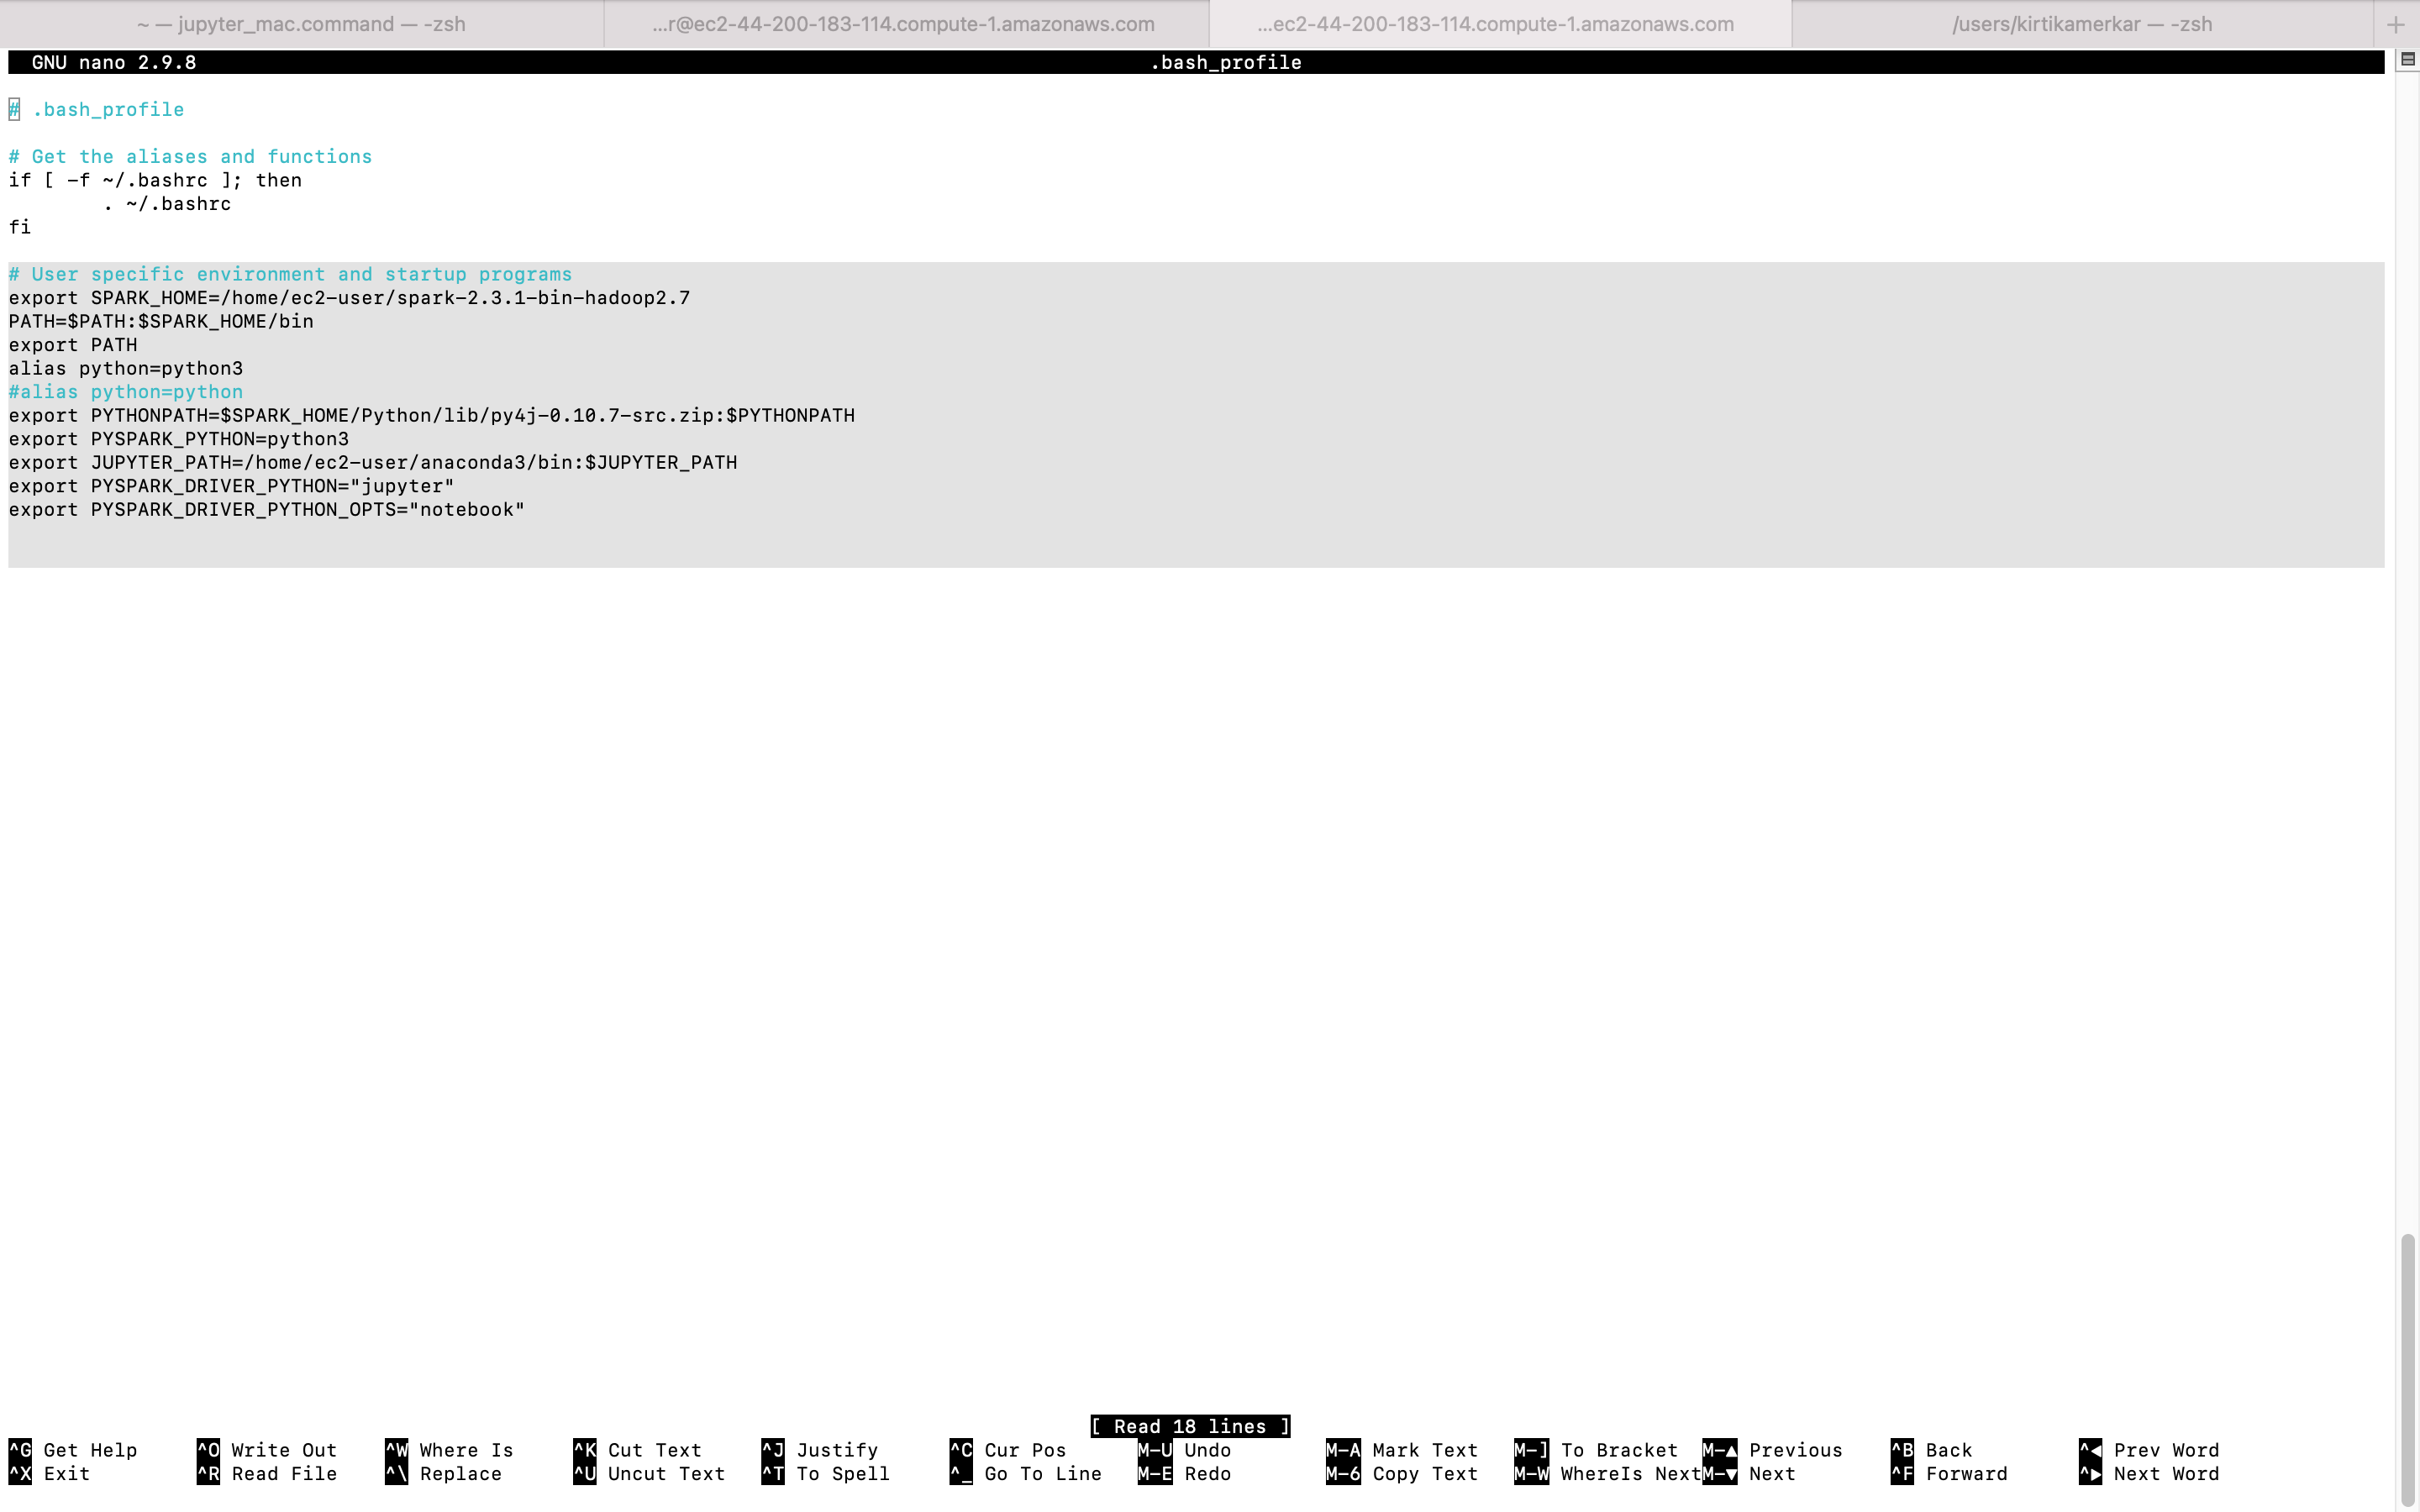

- Step 7: Spin the pyspark shell with
  - ./bin/pyspark
  - spark will start in jupyter notebook,open the Jupyter notebook url with EC2 DNS:
     - Ec2 public DNS:8888/?token=1bc7101bcee8336fa2667e14a25a2bc7020ab525e5949555


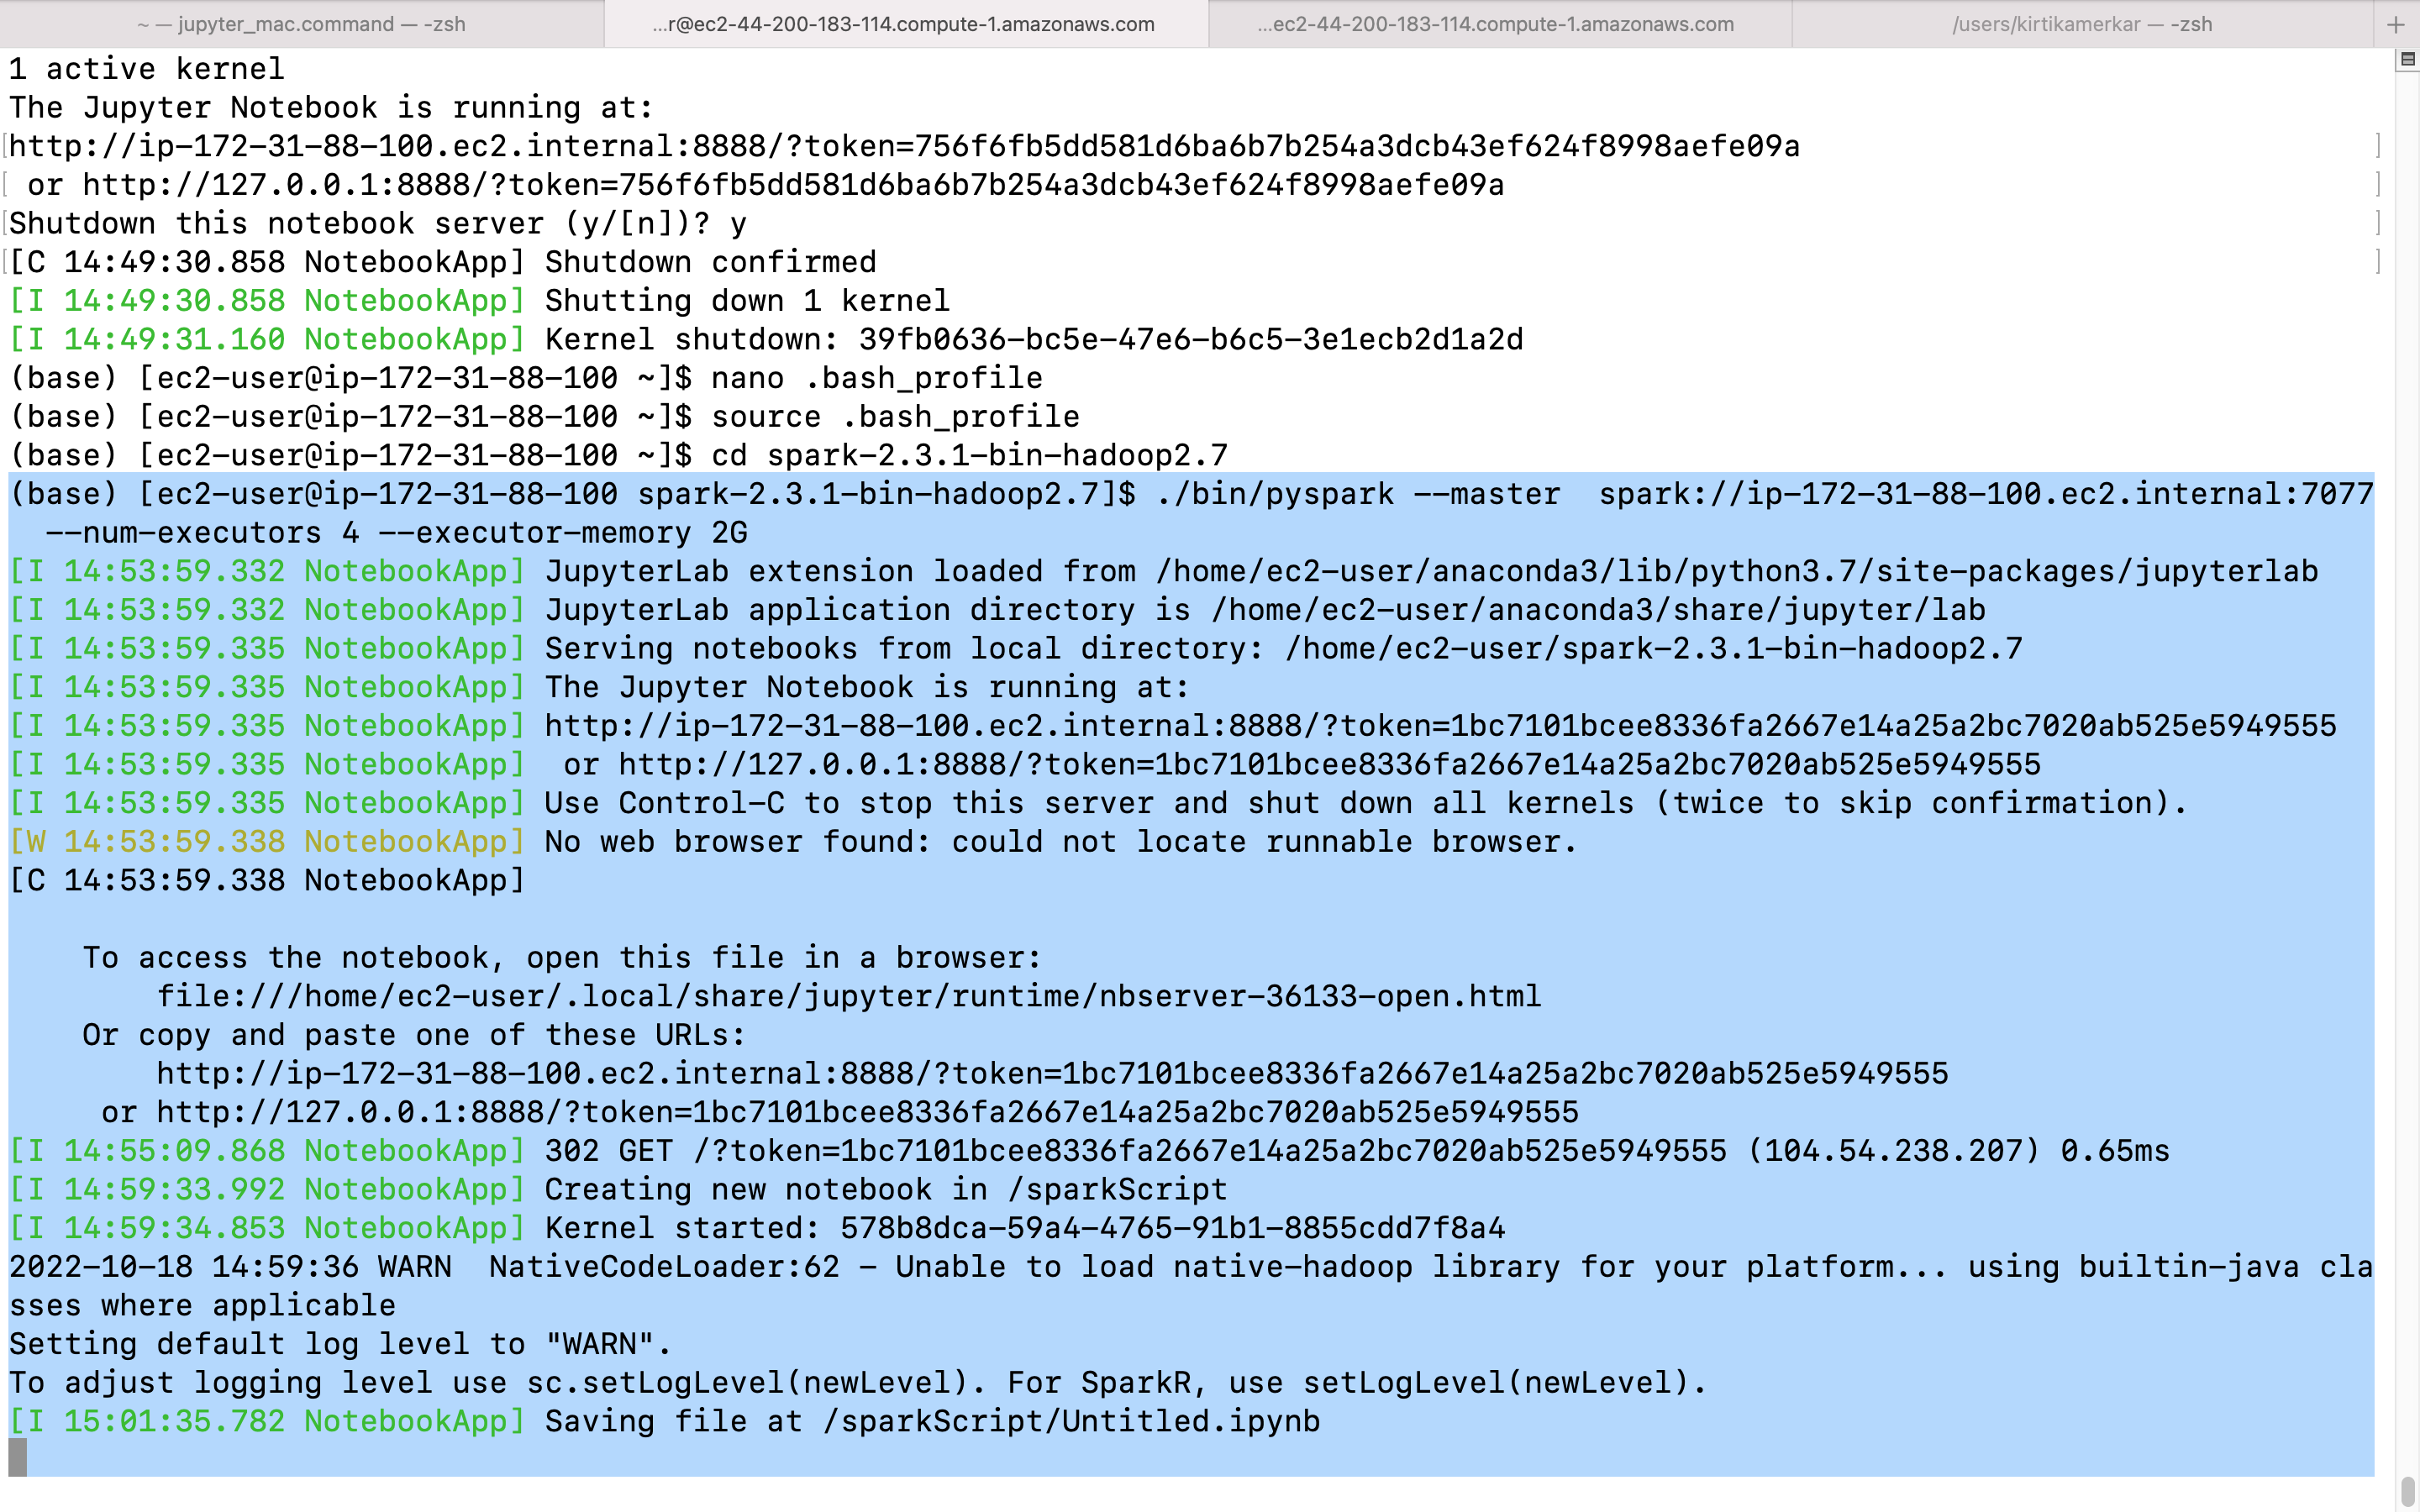

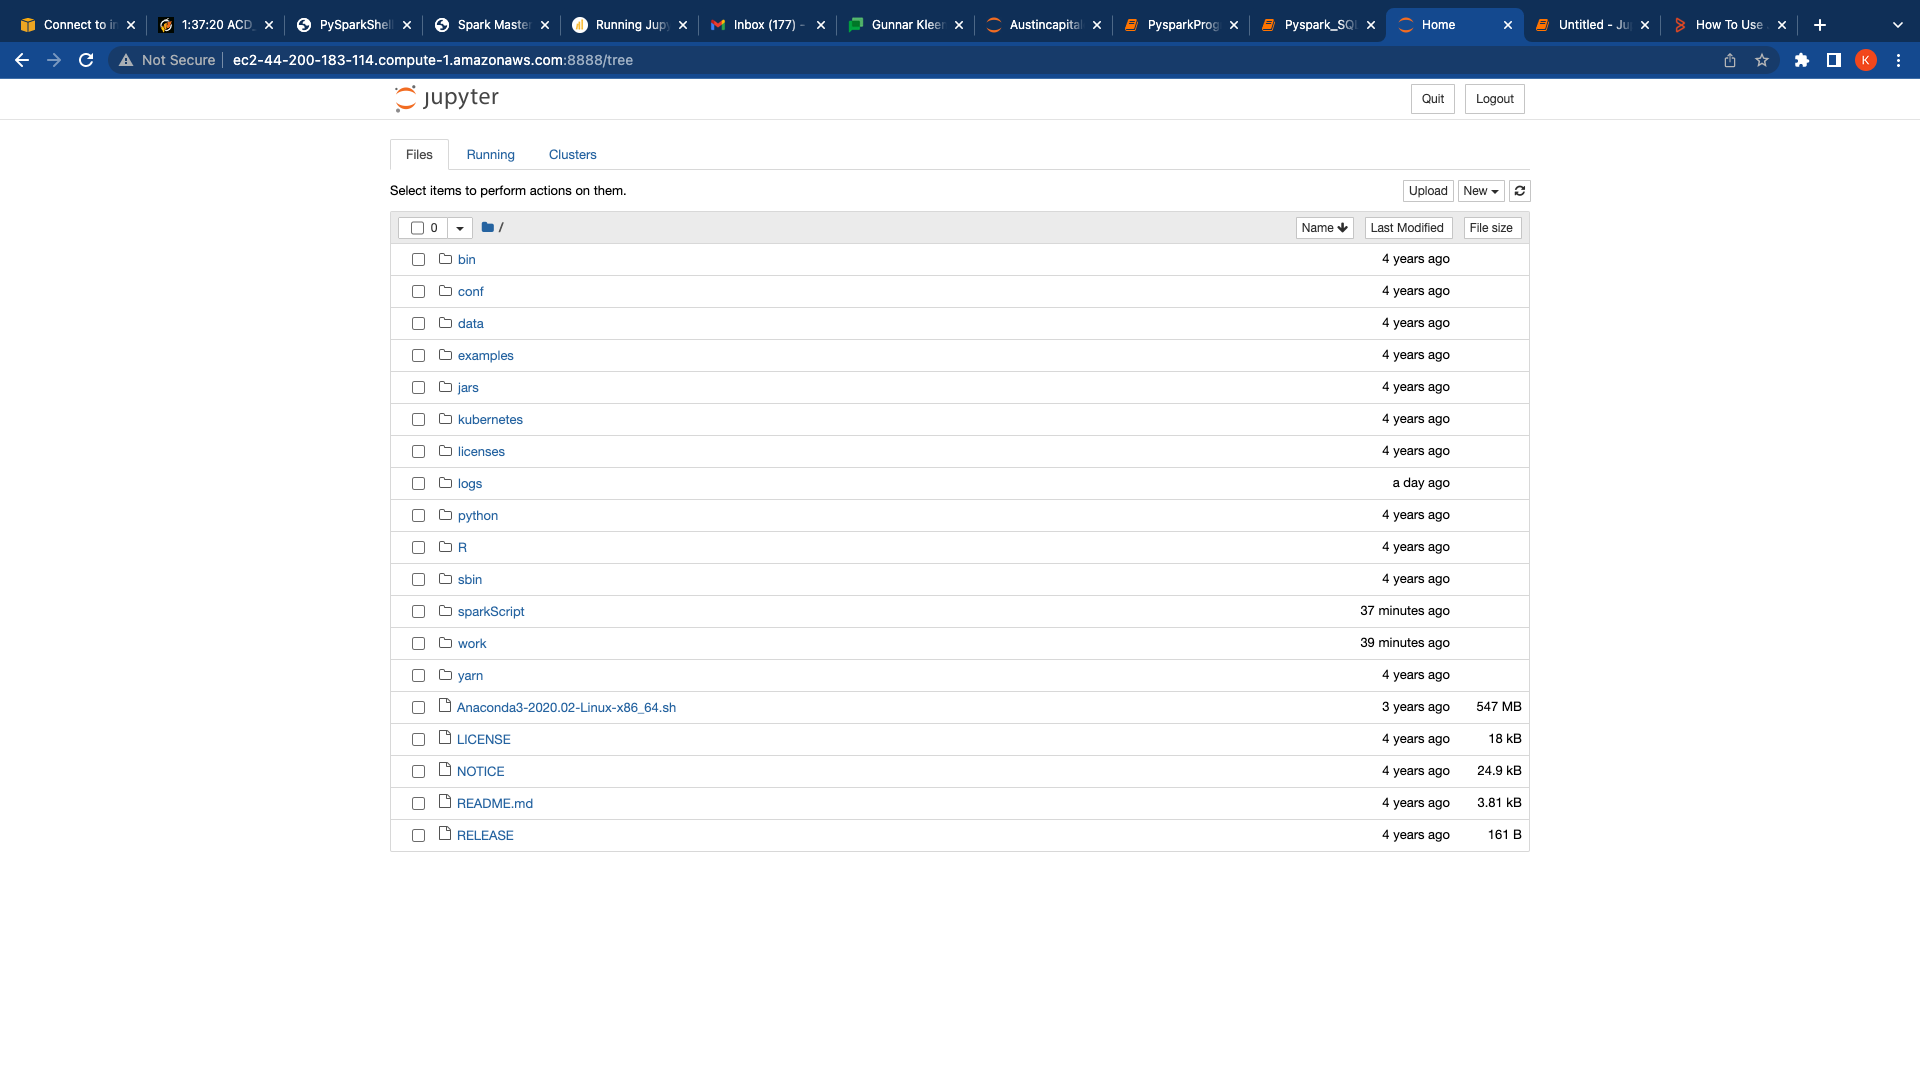